In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', size=18)
import cartopy.crs as ccrs
import xarray as xr
import salem
import numpy as np
import cv2
# !export PYTHONPATH='~/GIT_REPOS/spacebridge/pkgs'

In [ ]:
# Useful summary statistics function for numpy arrays
def summary(arr):
    nmax = np.nanmax(arr) if len(arr) > 0 else None
    nmin = np.nanmin(arr) if len(arr) > 0 else None
    return nmax, nmin, (nmax+nmin)/2 if len(arr) > 0 else None

## GNSS-R

In [3]:
def timegrid_description(pth):
    """
    A function that given a path to a GNSS-R netcdf returns 
        - the datetime based on the filename. Note format of the datetime matters.
        - the minimum lon/lat pair, and
        - the maximum lon/lat pair
    pth (str): pth to GNSS nc file
    """
    
    Datetime = pd.to_datetime(pth[70:89], format='%Y-%m-%dT%H-%M-%S')
    nc = xr.open_dataset(pth)
    minlon, maxlon, _ = summary(nc.longitude.values)
    minlat, maxlat, _ = summary(nc.latitude.values)
    return Datetime, minlon, minlat, maxlon, maxlat

timegrid_description('/volstore/spacebridge/gnssr_grzice/data/spire_gnss-r_L2_grzIce_v07.00_2020-03-01T00-07-19_FM102_G29.nc')

(Timestamp('2020-03-01 00:07:19'),
 -19.33371446234287,
 -61.21857892306003,
 -35.337494628984075,
 -74.51288840744537)

In [176]:
GLOB = '/volstore/spacebridge/gnssr_grzice/data/spire_gnss-r_L2_grzIce_v07.00_2020-03*'
files = glob.glob(GLOB) #[os.path.join(DIR,pth) for pth in os.(DIR)]
files.sort()
data = []
filenum = 1
for f in files:
    if filenum%100 == 1:
        print(filenum) 
    data.append(timegrid_description(f))
    filenum += 1
data

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
2901
3001
3101
3201
3301
3401
3501
3601
3701


[(Timestamp('2020-03-01 00:07:19'),
  -19.33371446234287,
  -61.21857892306003,
  -35.337494628984075,
  -74.51288840744537),
 (Timestamp('2020-03-01 01:21:44'),
  112.73288178863733,
  -53.97270035591964,
  104.58514616138432,
  -65.03620621218894),
 (Timestamp('2020-03-01 01:22:34'),
  -22.75412913385634,
  -73.01462328206343,
  -66.97531975621325,
  -76.3402859988352),
 (Timestamp('2020-03-01 01:30:14'),
  -99.30529844740113,
  -66.91267149150687,
  -109.434616435003,
  -71.51582759268096),
 (Timestamp('2020-03-01 01:31:42'),
  -156.84856348803868,
  -79.21315141682787,
  -156.9241720764131,
  -79.35928473771908),
 (Timestamp('2020-03-01 01:33:08'),
  -32.40404419960339,
  -80.38872536085665,
  -58.86224592984405,
  -82.21287858521173),
 (Timestamp('2020-03-01 01:37:14'),
  -13.738220846675063,
  -65.24326428915072,
  -31.31768045707463,
  -72.22528140786285),
 (Timestamp('2020-03-01 01:39:48'),
  -137.18949924362101,
  -48.62575731088403,
  -146.3926421155117,
  -64.00592025081467)

In [184]:
data = pd.DataFrame(data, columns=['DateTimeStamp', 'minlon', 'minlat', 'maxlon', 'maxlat'])
data.to_csv('~/domaininfo_202003.csv', sep=',', header=False, index=False)

In [192]:
data = pd.read_csv('/volstore/spacebridge/gnssr_grzice/data/domaininfo_202003.csv', 
                   header=None, 
                   names=['DateTimeStamp', 'minlon', 'minlat', 'maxlon', 'maxlat'])
data

DateTimeStamp      minlon     minlat      maxlon     maxlat
0     2020-03-01 00:07:19  -19.333714 -61.218579  -35.337495 -74.512888
1     2020-03-01 01:21:44  112.732882 -53.972700  104.585146 -65.036206
2     2020-03-01 01:22:34  -22.754129 -73.014623  -66.975320 -76.340286
3     2020-03-01 01:30:14  -99.305298 -66.912671 -109.434616 -71.515828
4     2020-03-01 01:31:42 -156.848563 -79.213151 -156.924172 -79.359285
...                   ...         ...        ...         ...        ...
3795  2020-03-30 23:07:03  -54.509252 -76.986349  -74.215729 -79.555136
3796  2020-03-30 23:10:08   19.445415 -68.484963   18.243320 -69.231584
3797  2020-03-30 23:13:47   24.386863 -66.431634   17.135900 -69.691613
3798  2020-03-30 23:29:26   30.450902 -47.706696   23.604617 -62.445352
3799  2020-03-30 23:47:09  -51.429154 -76.934531  -72.324567 -78.744336

[3800 rows x 5 columns]

Text(0.5, 1.0, 'maximum coordinates')

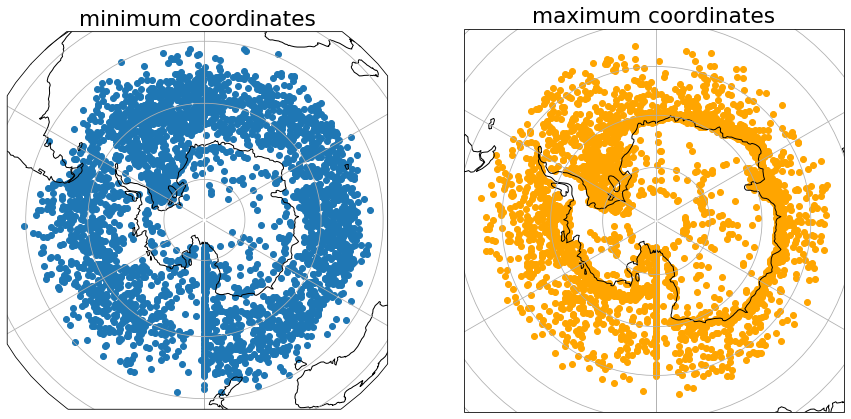

In [208]:
fig, axes = plt.subplots(
    1, 2, subplot_kw=dict(projection=ccrs.Orthographic(0,-90))
)
axes[0].scatter(x=data['minlon'], y=data['minlat'], transform=ccrs.PlateCarree())
axes[0].coastlines()
axes[0].gridlines()
axes[0].set_title('minimum coordinates')
axes[1].scatter(x=data['maxlon'], y=data['maxlat'], transform=ccrs.PlateCarree(), c='orange')
axes[1].coastlines()
axes[1].gridlines()
axes[1].set_title('maximum coordinates')

In [27]:
gnss1 = xr.open_dataset('/volstore/spacebridge/gnssr_grzice/data/spire_gnss-r_L2_grzIce_v07.00_2020-03-01T00-07-19_FM102_G29.nc')
gnss1

<xarray.Dataset>
Dimensions:                 (time_50Hz: 17447, time: 349, bands: 2, ecef: 3)
Coordinates:
  * time_50Hz               (time_50Hz) timedelta64[ns] 14665 days 00:07:37.0...
  * time                    (time) timedelta64[ns] 14665 days 00:07:37.523945...
  * bands                   (bands) int32 1 2
  * ecef                    (ecef) |S1 b'x' b'y' b'z'
Data variables: (12/28)
    sea_ice_presence        (time) int32 ...
    sea_ice_type            (time) int32 ...
    reflectivity            (bands, time) float64 ...
    snr_reflected           (bands, time) float64 ...
    snr_direct              (bands, time) float64 ...
    snr_l1b_reflected       (bands, time_50Hz) float64 ...
    ...                      ...
    flag_land               (time) int32 ...
    flag_high_elevation     (time) int32 ...
    flag_low_elevation      (time) int32 ...
    flag_antenna_gain       (bands, time) int32 ...
    flag_climatology        (time) int32 ...
    flag_master             (time) int32 ...
Attributes: (12/26)
    processing_center:           Spire Processing Center
    proc_version:                v07.00
    mission:                     Spire
    creation_time:               2022-01-19 16:22:56 UTC
    wavelength_l1:               0.19029367
    wavelength_l2:               0.24421021
    ...                          ...
    fill_value:                  -999
    leo_sat:                     102
    occultation_sat:             G29
    gps_seconds_start:           1267056457.5239453
    gps_seconds_stop:            1267056805.5321515
    history:                     derived from:\nspire_gnss-r_L1B_grzRfl_v07.0...

In [208]:
gnss1.rx_pos.valid_range

array([-1.e+10,  1.e+10])

**Variable decisions**

- Only using variables that have time dimension, i.e. noise_rx and noise_l1b variables are ignored
- variables with additional dimensions, i.e. bands and ecef are split into multiple variables
- only timesteps where flag_master == 0 are kept
- all variables are normalize based on the given valid_range



In [214]:
def norm(ser, valid_range):
    """
    Normalize given series, ser, based on the valid range
    """
    min = valid_range[0]
    max = valid_range[1]
    return (ser - min)/(max - min)

In [213]:
def get_series(xr_gnss, varname, use_master_flag=True, normalize=True):
    """
    xr_gnss: an xarray dataset or dataArray 
    varname: name of the variable to be extracted
    use_master_flag: Boolean indicating whether to 
                    include only the timesteps where
                    flag_master == 0
                    
    Returns: a numpy array of values of given variable
            name split into multiple columns if variable
            has bands or ecef dimensions.
    """
    split_by_bands = ['reflectivity',
            'snr_reflected',
            'snr_direct',
            'phase_noise',
            'excess_phase_noise',
            'power_reflected',
            'power_direct',
            'antenna_gain_reflected',
            'antenna_gain_direct',
            ]
    split_by_ecef = ['rx_pos',
            'tx_pos',
            'spec_pos',]
    
    if varname in split_by_ecef:
        ser = xr_gnss[varname].T[:, xr_gnss.flag_master == 0].values if use_master_flag else xr_gnss[var].T.values
    elif varname in split_by_bands:
        ser = xr_gnss[varname][:, xr_gnss.flag_master == 0].values if use_master_flag else xr_gnss[var].values
    else: 
        ser = xr_gnss[varname][xr_gnss.flag_master == 0].values if use_master_flag else xr_gnss[var].values
    ser = norm(ser, valid_range=xr_gnss[varname].valid_range) if normalize else ser
    
    return ser

In [215]:
def extract_variables(xr_gnss, use_master_flag=True, normalize=True):
    """
    xr_gnss: an xarray dataset or dataarray
    use_master_flag: Boolean indicating whether to 
                    include only the timesteps where
                    flag_master == 0
    
    Returns: a numpy array containing the rectangular 
            data with variables as columns and timesteps as 
            rows, and a vector of column names.
    """
    keys = ['reflectivity',
            'snr_reflected',
            'snr_direct',
            'phase_noise',
            'excess_phase_noise',
            'power_reflected',
            'power_direct',
            'antenna_gain_reflected',
            'antenna_gain_direct',
            'rx_pos',
            'tx_pos',
            'spec_pos',
            'angle_of_elevation',
            'longitude',
            'latitude']
    
    data = []
    columns = []
    bands = xr_gnss.bands.values
    ecef = ['x','y','z']
    for var in keys:
        vardata = get_series(xr_gnss, var, use_master_flag=use_master_flag, normalize=normalize)
        if len(vardata.shape) == 2:
            numser = vardata.shape[0]
            [data.append(ser) for ser in vardata]
            suffix = [bands[num] if numser == 2 else ecef[num] if numser == 3 else None for num in range(numser)]
            [columns.append(var + str(suf)) for suf in suffix]
        else:
            data.append(vardata)
            columns.append(var)
        
    
    return np.array(data).T, columns
    

In [217]:
data, columns = extract_variables(gnss1, normalize=False)
df = pd.DataFrame(data=data, columns=columns)
df

reflectivity1  reflectivity2  snr_reflected1  snr_reflected2  \
0         0.000029       0.000215        0.259596        0.222880   
1         0.000041       0.000598        0.371085        0.630792   
2         0.000177       0.002538        1.633053        2.670349   
3         0.000642       0.004634        5.975615        4.940930   
4         0.001144       0.006747       10.822647        7.094985   
..             ...            ...             ...             ...   
321       0.000290       0.000813        0.608297        0.489220   
322       0.000558       0.001203        1.157048        0.716249   
323       0.000714       0.000302        1.497052        0.181862   
324       0.000404       0.002354        0.851044        1.387652   
325       0.000461       0.002232        0.975926        1.285502   

     snr_direct1  snr_direct2  phase_noise1  phase_noise2  \
0     480.191211   244.139219      2.120122      2.164417   
1     483.310290   249.047285      2.452164      1.626376   
2     488.528382   248.258247      2.049147      1.309340   
3     491.307927   251.539463      1.568170      1.103030   
4     499.613216   248.085385      1.505073      1.287322   
..           ...          ...           ...           ...   
321  1806.983083   571.485197      2.623274      2.191442   
322  1793.567699   565.503137      2.197510      2.221832   
323  1804.875286   572.276678      2.286888      1.922294   
324  1802.448594   559.611021      1.803531      2.148122   
325  1801.518565   545.834923      1.803624      1.802042   

     excess_phase_noise1  excess_phase_noise2  ...       rx_posz  \
0               0.204219             0.137304  ... -6.170504e+06   
1               0.817353             0.372714  ... -6.167282e+06   
2               1.266973             0.697409  ... -6.164052e+06   
3               1.159089             0.653152  ... -6.160815e+06   
4               1.201101             0.911896  ... -6.157570e+06   
..                   ...                  ...  ...           ...   
321             1.346596             0.766686  ... -4.775287e+06   
322             1.269376             1.045143  ... -4.769901e+06   
323             1.470123            -0.238561  ... -4.764508e+06   
324             0.723216             1.299965  ... -4.759110e+06   
325             0.793984             0.921080  ... -4.753706e+06   

          tx_posx       tx_posy       tx_posz     spec_posx     spec_posy  \
0   -1.556484e+07  7.695930e+06 -2.013748e+07  1.689755e+06 -6.492097e+05   
1   -1.556714e+07  7.694826e+06 -2.013613e+07  1.693076e+06 -6.528345e+05   
2   -1.556943e+07  7.693723e+06 -2.013478e+07  1.696392e+06 -6.564585e+05   
3   -1.557172e+07  7.692619e+06 -2.013343e+07  1.699704e+06 -6.600816e+05   
4   -1.557401e+07  7.691516e+06 -2.013208e+07  1.703010e+06 -6.637038e+05   
..            ...           ...           ...           ...           ...   
321 -1.629566e+07  7.352567e+06 -1.968226e+07  2.504505e+06 -1.767311e+06   
322 -1.629792e+07  7.351532e+06 -1.968078e+07  2.506270e+06 -1.770676e+06   
323 -1.630018e+07  7.350497e+06 -1.967929e+07  2.508031e+06 -1.774040e+06   
324 -1.630244e+07  7.349462e+06 -1.967781e+07  2.509787e+06 -1.777404e+06   
325 -1.630470e+07  7.348427e+06 -1.967632e+07  2.511538e+06 -1.780767e+06   

        spec_posz  angle_of_elevation  longitude   latitude  
0   -6.095366e+06           19.841130 -21.016599 -73.564446  
1   -6.094066e+06           19.789848 -21.085831 -73.523324  
2   -6.092763e+06           19.738613 -21.154757 -73.482213  
3   -6.091457e+06           19.687423 -21.223381 -73.441113  
4   -6.090149e+06           19.636281 -21.291703 -73.400024  
..            ...                 ...        ...        ...  
321 -5.574519e+06            5.685430 -35.208361 -61.356843  
322 -5.572670e+06            5.647992 -35.240687 -61.322248  
323 -5.570820e+06            5.610591 -35.272984 -61.287673  
324 -5.568969e+06            5.573225 -35.305253 -61.253116  
325 -5.567117e+06  

In [11]:
datetimestr = f"{gnss1.year}{gnss1.month}{gnss1.day} {gnss1.hour}:{gnss1.minute}:{gnss1.second}"
pd.timedelta_range(start=datetimestr, periods=len(gnss1.time), freq='1s')

TimedeltaIndex(['84179 days 14:07:37.023933410',
                '84179 days 14:07:38.023933410',
                '84179 days 14:07:39.023933410',
                '84179 days 14:07:40.023933410',
                '84179 days 14:07:41.023933410',
                '84179 days 14:07:42.023933410',
                '84179 days 14:07:43.023933410',
                '84179 days 14:07:44.023933410',
                '84179 days 14:07:45.023933410',
                '84179 days 14:07:46.023933410',
                ...
                '84179 days 14:13:16.023933410',
                '84179 days 14:13:17.023933410',
                '84179 days 14:13:18.023933410',
                '84179 days 14:13:19.023933410',
                '84179 days 14:13:20.023933410',
                '84179 days 14:13:21.023933410',
                '84179 days 14:13:22.023933410',
                '84179 days 14:13:23.023933410',
                '84179 days 14:13:24.023933410',
                '84179 days 14:13:25.023933410'],

In [30]:
lonice = gnss1.longitude[(gnss1.sea_ice_presence == 1) & (gnss1.flag_master == 0)]
lonwater = gnss1.longitude[(gnss1.sea_ice_presence == 0) & (gnss1.flag_master == 0)]
latice = gnss1.latitude[(gnss1.sea_ice_presence == 1) & (gnss1.flag_master == 0)]
latwater = gnss1.latitude[(gnss1.sea_ice_presence == 0) & (gnss1.flag_master == 0)]
summary(lonice), summary(lonwater), summary(latice), summary(latwater)

((-21.154757436905754, -22.908928955021338, -22.031843195963546),
 (-21.016599235847877, -35.337494628984075, -28.177046932415976),
 (-72.37695685383878, -73.48221277476915, -72.92958481430396),
 (-61.21857892306003, -73.56444599895367, -67.39151246100685))

/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/stefan/mambaf

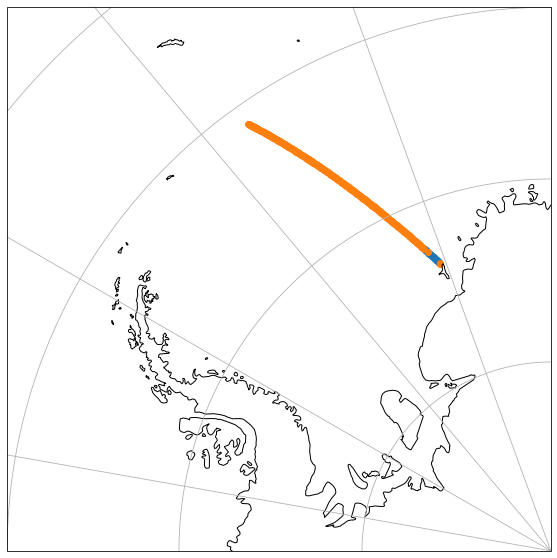

In [31]:
# from mpl_toolkits.basemap import Basemap
# use low resolution coastlines.
# map = Basemap(projection='ortho',lat_0=-90,lon_0=0,resolution='l')
fig, ax = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(0,-90))
)
# extent = ax.get_extent(crs=ccrs.PlateCarree())
# print(extent)
ax.scatter(lonice, latice, transform=ccrs.PlateCarree())
ax.scatter(lonwater, latwater, transform=ccrs.PlateCarree())
ax.set_extent((-90,0,-90,-60))
ax.coastlines()
ax.gridlines()

In [4]:
DIR = '/volstore/spacebridge/spacebridge_csv'
files = [os.path.join(DIR,pth) for pth in os.listdir(DIR)]
files.sort()
files

['/volstore/spacebridge/spacebridge_csv/MLTraining_202002.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202003.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202004.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202005.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202006.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202007.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202008.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202009.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202010.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202011.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202012.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202101.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202102.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202103.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202104.csv',
 '/volstore/spacebridge/spacebridge_csv/

In [5]:
class GNSS_meta(object):
    def __init__(self, path):
        self.path = path
        self.year = os.path.basename(os.path.splitext(self.path)[0])[-6:-2]
        self.mon = os.path.basename(os.path.splitext(self.path)[0])[-2:]
        self.load()
    def load(self):
        self.data = pd.read_csv(self.path, usecols = [1,2,3])
        try:
            iceconc_mean = xr.open_dataset(f'/volstore/spacebridge/iceconc_osisaf/{self.year}/{self.mon}/ice_conc_sh_polstere-100_multi_{self.year}{self.mon}_monmean.nc')
            iceedge = pd.DataFrame({'lon': iceconc_mean.ice_conc.lon.data.flatten(),
                            'lat': iceconc_mean.ice_conc.lat.data.flatten(),
                            'edge': iceconc_mean.ice_conc.data.flatten()})
            iceedge = iceedge[(iceedge['edge'] > 14.5) & (iceedge['edge'] < 15.5)] 
            iceedge.sort_values(by='lon',inplace=True)
            self.iceedge = iceedge
        except FileNotFoundError as fnf_error:
            self.iceedge = None
            print(fnf_error)
    def __str__(self):
        return str(self.data.head())
    def __repr__(self):
        return str(self)
    def __len__(self):
        return len(self.data)
    def set_extent(self, lat1, lat2, lon1=-180, lon2=180):
        assert lon1 < lon2, 'lon1 must be smaller than lon2'
        assert lat1 < lat2, 'lat1 must be smaller than lat2'
        self.data = self.data[(self.data['latitude'] > lat1) & (self.data['latitude'] <= lat2) & (self.data['longtiude'] > lon1) & (self.data['longtiude'] <= lon2)]
    def plot(self, fig=None, ax=None, legend=True):
        if fig is None:
            fig = plt.figure()
            ax = plt.axes(projection=ccrs.Orthographic(0,-90))
            ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree())
        else:
            assert ax is not None, 'Axes must be provided for multi-panel plot'
        im = ax.hexbin(x=self.data['longtiude'], y=self.data['latitude'], gridsize=(3*36,3*18), cmap='Greens', transform=ccrs.PlateCarree())
        fig.colorbar(im, label='hexbins of number of\nGNSS scatterometer pings', ax=ax)
        ax.set_title(f'{self.year} {self.mon}')
        ax.coastlines()
        if self.iceedge is not None:
            ax.plot(self.iceedge.lon,self.iceedge.lat,label='Antarctic ice edge', transform=ccrs.PlateCarree())
            if legend:
                ax.legend()

/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/stefan/mambaf

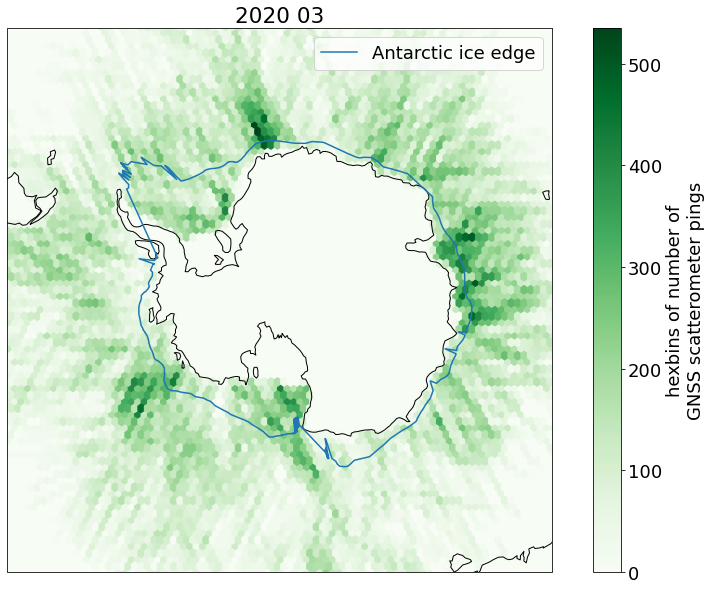

In [6]:
f = GNSS_meta(files[1])
f.plot()

In [7]:
f = GNSS_meta(files[0])
f.data

latitude  longtiude          time
0       65.392926 -39.022798  1.265607e+09
1       65.343509 -39.050232  1.265607e+09
2       65.294101 -39.077616  1.265607e+09
3       65.244701 -39.104950  1.265607e+09
4       65.195310 -39.132235  1.265607e+09
...           ...        ...           ...
210009  65.085143 -54.696937  1.267056e+09
210010  65.126901 -54.737484  1.267056e+09
210011  65.168680 -54.778173  1.267056e+09
210012  65.210480 -54.819006  1.267056e+09
210013  65.252301 -54.859983  1.267056e+09

[210014 rows x 3 columns]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/stefan/mambaf

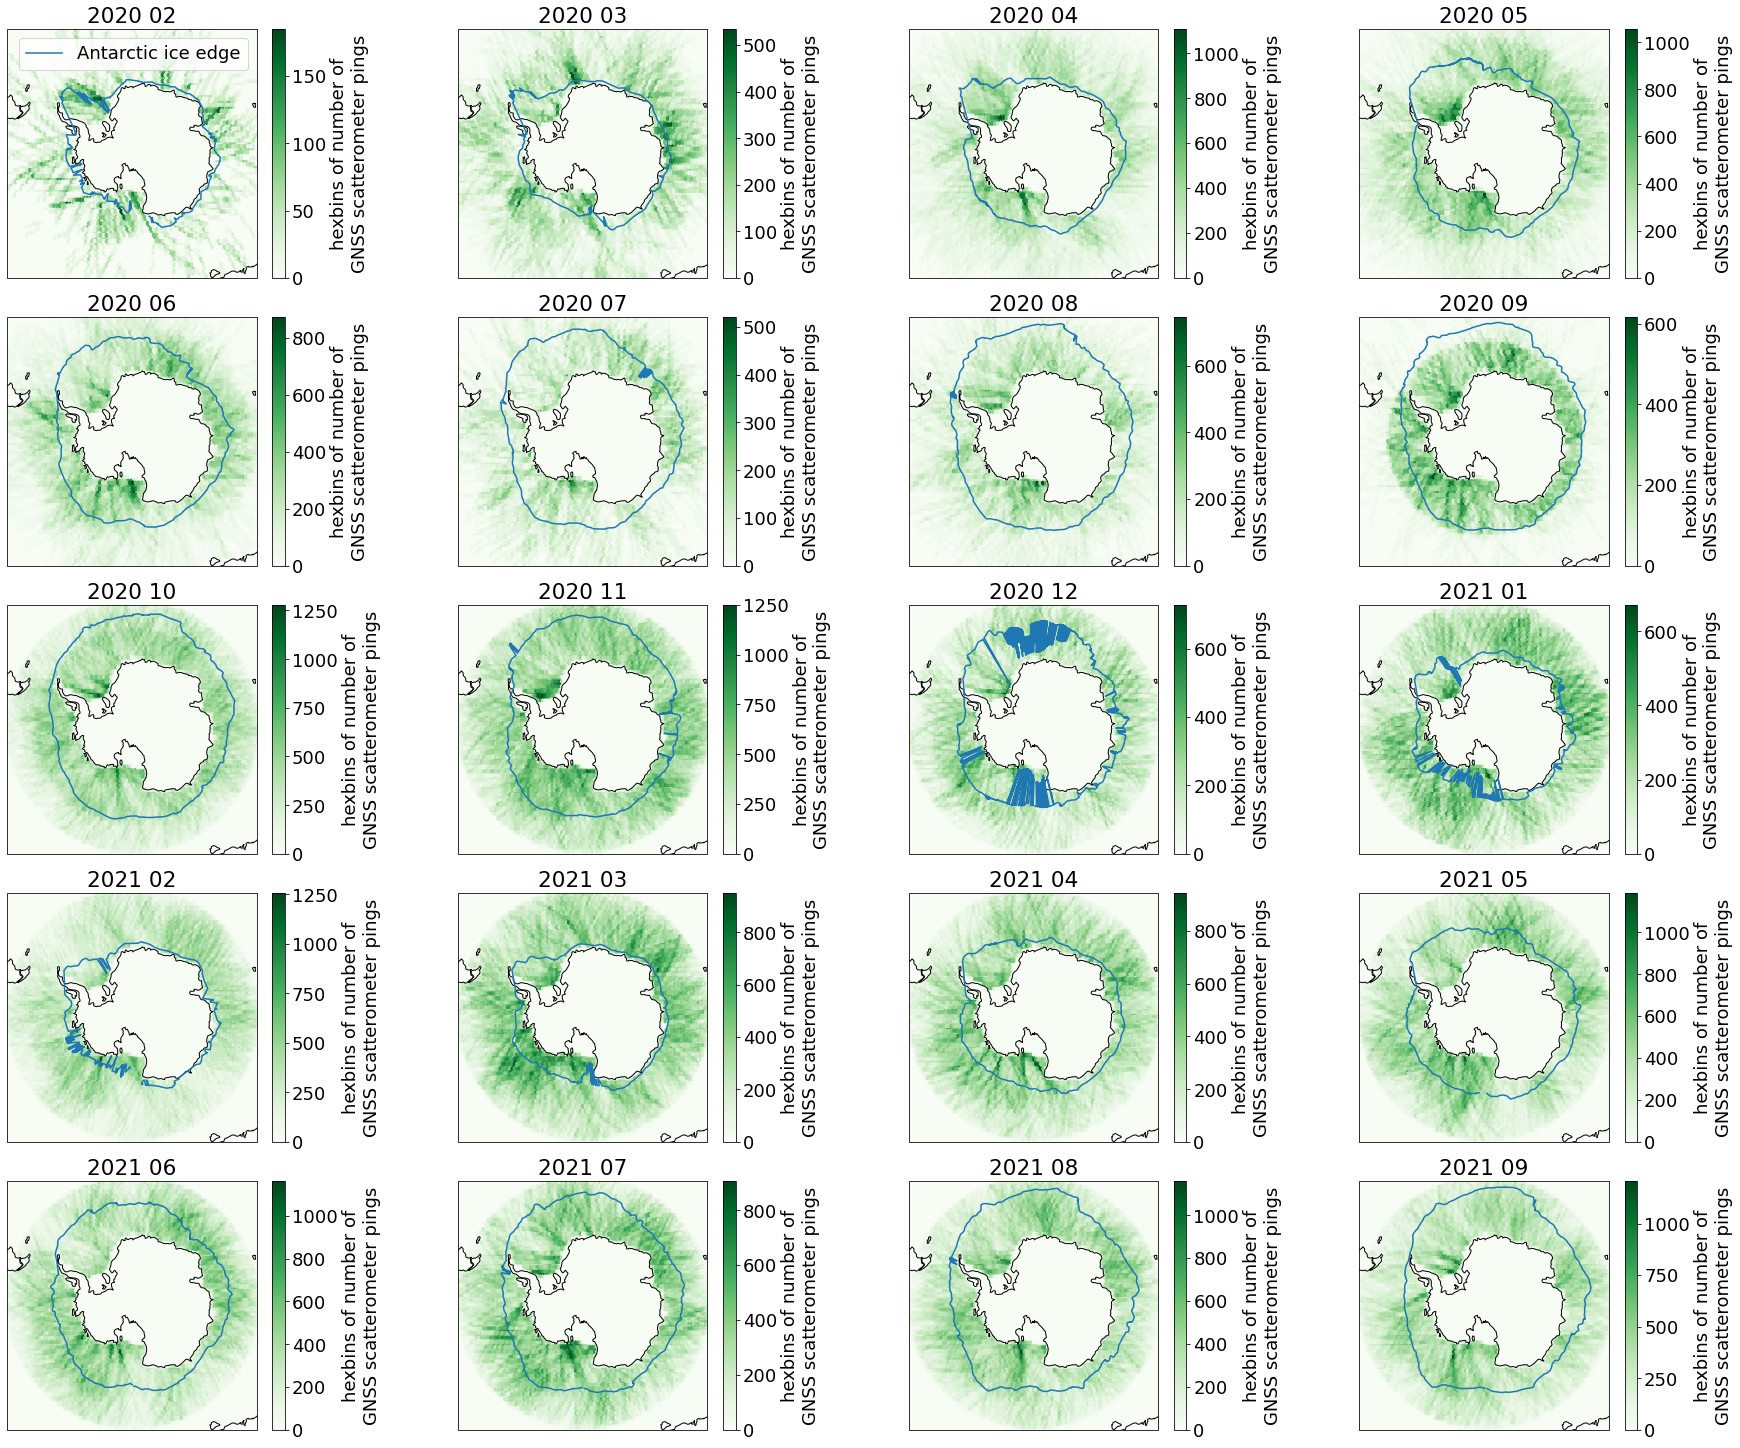

In [60]:
PATHS = files
fig, axs = plt.subplots(ncols=4, nrows=5, constrained_layout=True, subplot_kw={'projection':ccrs.Orthographic(0,-90)})
for k, ax in enumerate(axs.flatten()):
    print(k)
    ax.set_extent([-180,180,-50,-90], crs=ccrs.PlateCarree())
    GNSS = GNSS_meta(PATHS[k])
    legend = True if k == 0 else False
    GNSS.plot(fig=fig, ax=ax, legend=legend)

In [86]:
GNSS_202103.set_extent(-90, 0)
len(GNSS_202103)

116017

## OSI-SAF Ice Concentration

In [10]:
ic = xr.open_dataset('/volstore/spacebridge/iceconc_osisaf/2020/01/ice_conc_sh_polstere-100_multi_202001011200.nc')
ic

<xarray.Dataset>
Dimensions:                   (time: 1, nv: 2, xc: 790, yc: 830)
Coordinates:
  * time                      (time) datetime64[ns] 2020-01-01T12:00:00
  * xc                        (xc) float64 -3.945e+03 -3.935e+03 ... 3.945e+03
  * yc                        (yc) float64 4.345e+03 4.335e+03 ... -3.945e+03
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    ice_conc                  (time, yc, xc) float32 ...
    ice_conc_unfiltered       (time, yc, xc) float32 ...
    masks                     (time, yc, xc) float32 ...
    confidence_level          (time, yc, xc) float32 ...
    status_flag               (time, yc, xc) float32 ...
    total_uncertainty         (time, yc, xc) float32 ...
    smearing_uncertainty      (time, yc, xc) float32 ...
    algorithm_uncertainty     (time, yc, xc) float32 ...
Attributes: (12/30)
    title:                   Daily Sea Ice Concentration Analysis from OSI SA...
    product_id:              OSI-401
    product_name:            osi_saf_ice_conc
    product_status:          operational
    abstract:                The daily analysis of sea ice concentration is o...
    topiccategory:           Oceans Climatology Meteorology Atmosphere
    ...                      ...
    references:              Product User Manual for OSI SAF Global Sea Ice C...
    history:                 2020-01-02 creation
    product_version:         4.0
    software_version:        1.3
    netcdf_version:          3.6.3
    Conventions:             CF-1.6

In [ ]:
fig = ic.ice_conc.plot(x="lon", y="lat", transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.SouthPolarStereo()))
fig.axes.coastlines()

## Fraser et al. 2021 Fast Ice Persistence

In [ ]:
ds = xr.open_dataset('/volstore/spacebridge/fraser_2021_fastice_persistence/fastice_v2.2_persistence.nc')
ds

<xarray.Dataset>
Dimensions:       (Y: 4700, X: 5625)
Coordinates:
    latitude      (Y, X) float32 ...
    longitude     (Y, X) float32 ...
Dimensions without coordinates: Y, X
Data variables:
    persistence   (Y, X) float32 ...
    groundedmask  (Y, X) float32 ...
    iceshelfmask  (Y, X) float32 ...

In [15]:
ds.lati.dims[1]

'X'

/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/stefan/mambaf

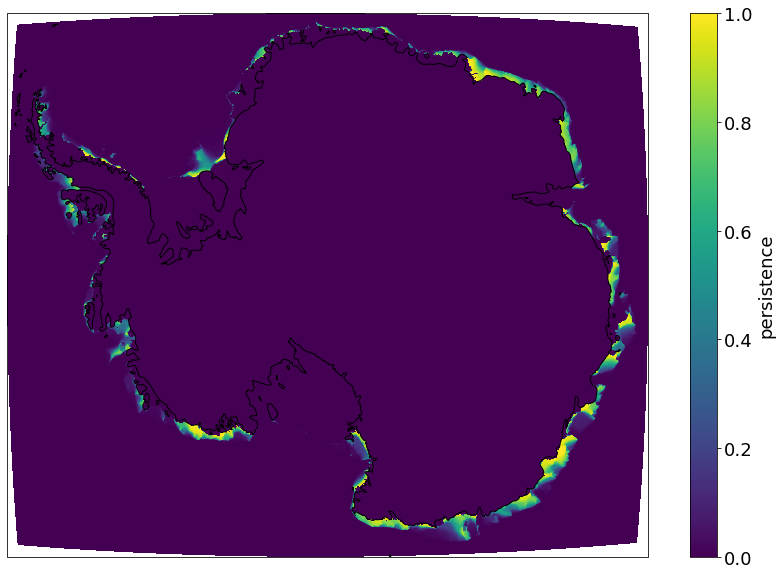

In [70]:
fig = ds.persistence.plot(x="longitude", y="latitude", transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.Orthographic(0,-90)})
fig.axes.coastlines()

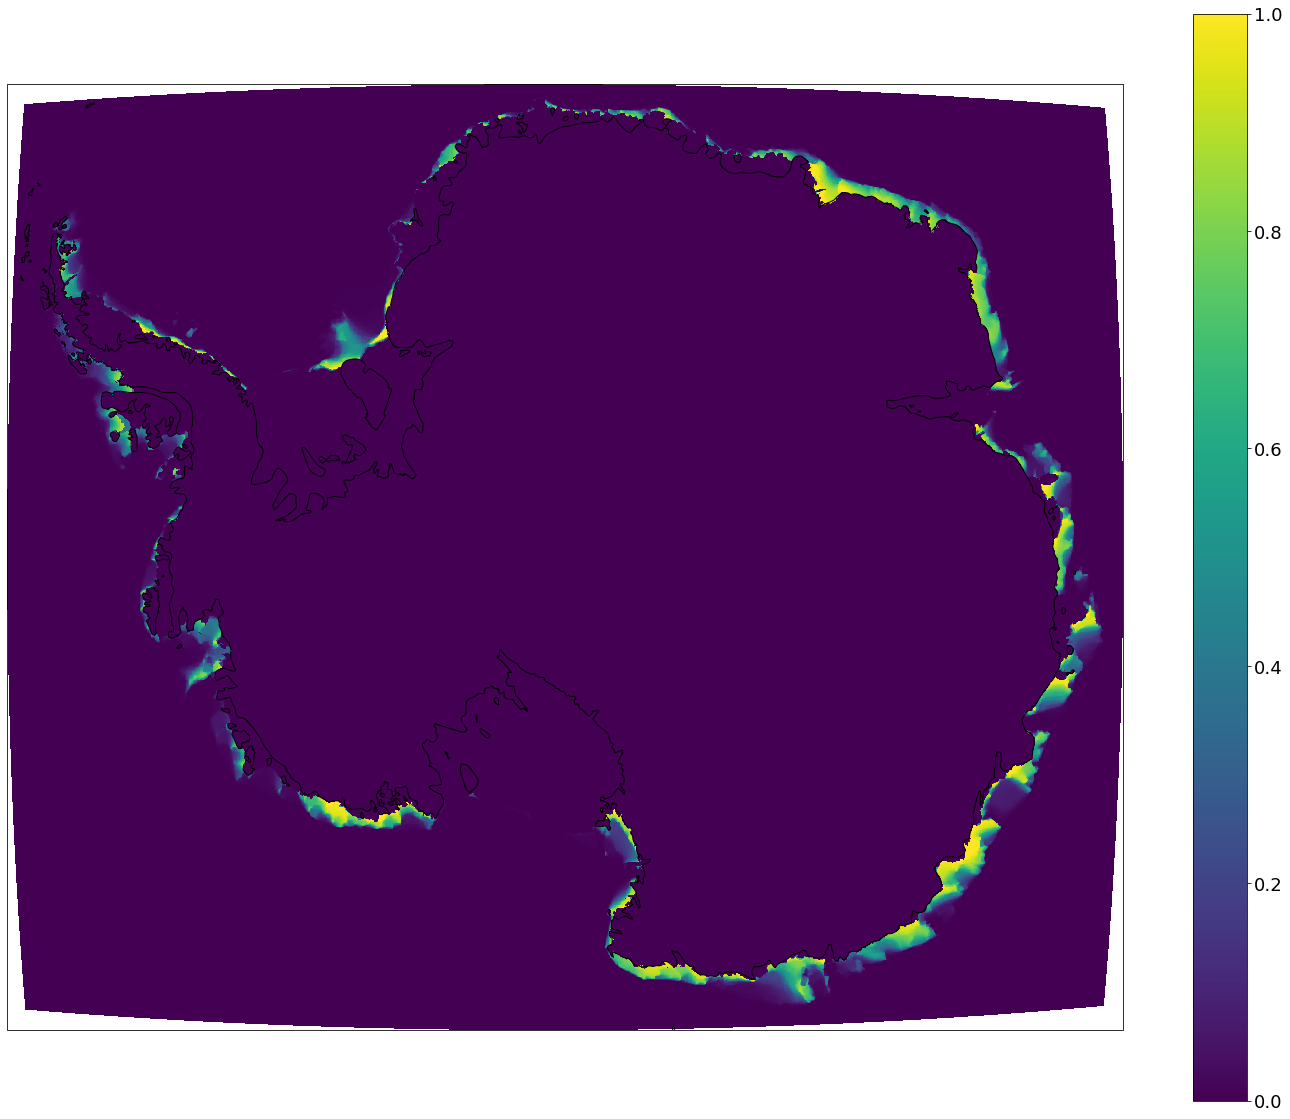

In [27]:
fig, ax = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(0,-90))
)

f = ax.pcolormesh(ds.longitude.values[0::4, 0::4], ds.latitude.values[0::4, 0::4], ds.persistence.values[0::4, 0::4], transform=ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(f, ax=ax)

## University of Bremen MultiYear Ice Concentration

In [67]:
# load the Lon Lat info first
import h5py
f = h5py.File('/volstore/spacebridge/iceage_Melsheimer/2020/MultiYearIce-Antarctic-20201001.nc', 'r')
f['X›'][:], 
# grid = xr.open_rasterio('/volstore/spacebridge/iceage_Melsheimer/LongitudeLatitudeGrid-n12500-Arctic.hdf', engine='h5netcdf')
# grid

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [4]:
UBremMYI = xr.open_dataset('/volstore/spacebridge/iceage_Melsheimer/2020/MultiYearIce-Antarctic-20201001.nc')
UBremMYI = UBremMYI.reindex(X=UBremMYI.X[::-1],Y=UBremMYI.Y)
UBremMYI

<xarray.Dataset>
Dimensions:  (X: 664, Y: 632)
Coordinates:
  * X        (X) int64 663 662 661 660 659 658 657 656 655 ... 8 7 6 5 4 3 2 1 0
  * Y        (Y) int64 0 1 2 3 4 5 6 7 8 ... 623 624 625 626 627 628 629 630 631
Data variables:
    MYI      (X, Y) float32 ...
    CR-FLAG  (X, Y) int32 ...
    EXMYI    (X, Y) float32 ...
Attributes:
    Convention:   None
    title:        Multiyear ice concentration from active and passive microwa...
    institution:  University of Bremen
    references:   http://www.seaice.uni-bremen.de/multiyear-ice-concentration
    grid_info:    NSIDC polar stereographic 12.5km grid, Antarctic, \n    see...
    comment:      Projection information: NSIDC Sea Ice Polar Stereographic S...

In [7]:
lonlat = xr.open_dataset('/volstore/spacebridge/iceage_Melsheimer/ECICE-IcetypesUncorrected-20160601.nc')
lon = lonlat.LON.values
lat = lonlat.LAT.values

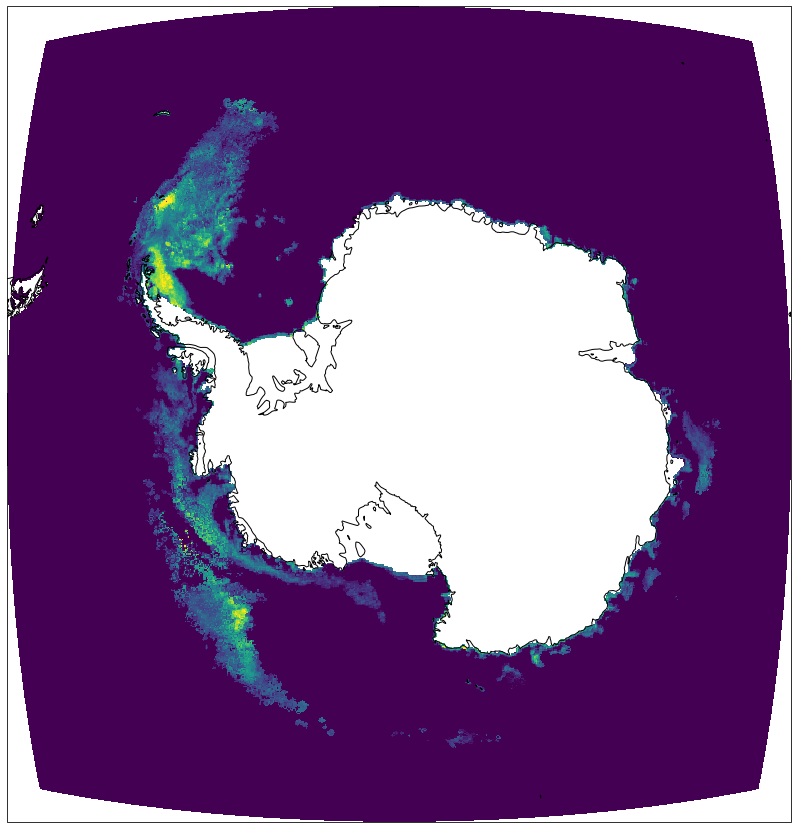

In [12]:
fig, ax = plt.subplots(1,1,figsize=[15,15], subplot_kw={'projection':ccrs.Orthographic(0,-90)})
# crs = ccrs.Projection('+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs')
ax.pcolormesh(lon, lat, UBremMYI.MYI, transform=ccrs.PlateCarree())
ax.coastlines(resolution="50m")

/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/stefan/mambaf

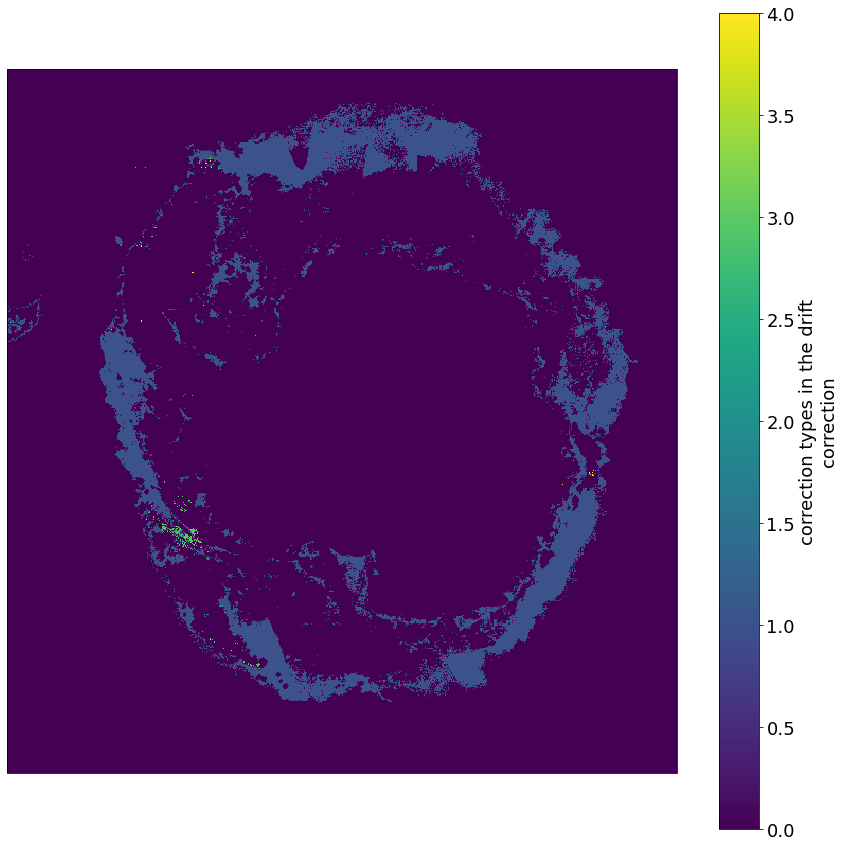

In [10]:
fig, ax = plt.subplots(1,1,figsize=[15,15], subplot_kw={'projection':ccrs.Orthographic(0,-90)})
crs = ccrs.Projection('+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs')
fig = UBremMYI['CR-FLAG'].plot(transform=crs)
ax.coastlines()

/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/stefan/mambaf

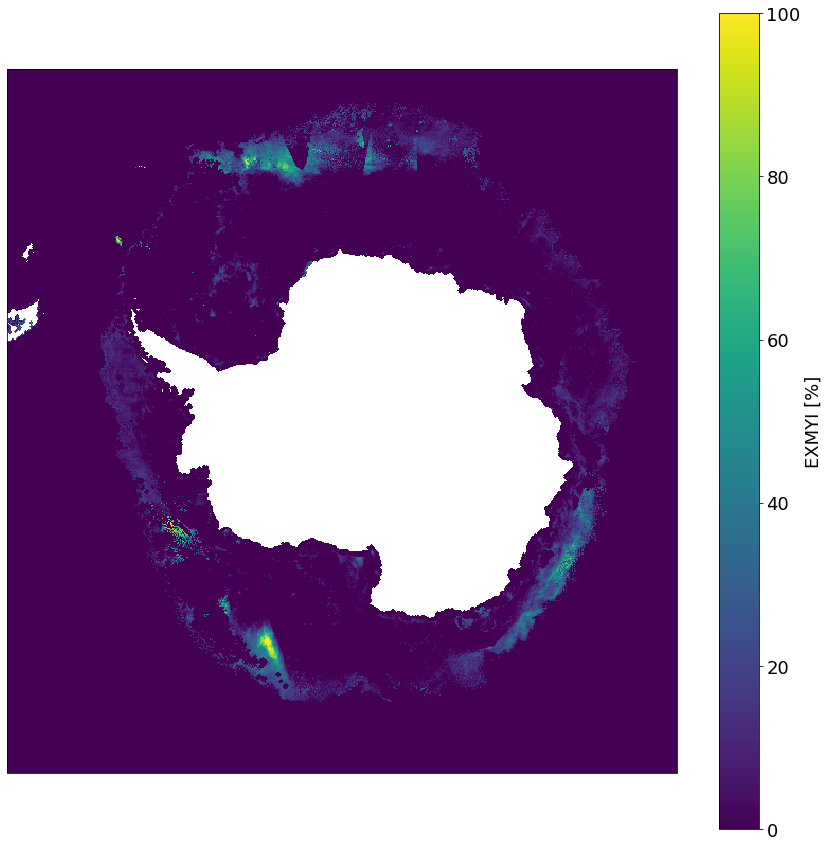

In [92]:
fig, ax = plt.subplots(1,1,figsize=[15,15], subplot_kw={'projection':ccrs.Orthographic(0,-90)})
crs = ccrs.Projection('+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs')
fig = UBremMYI['EXMYI'].plot(transform=crs)
ax.coastlines()

In [5]:
crs

<Derived Projected CRS: +proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 + ...>
Name: unknown
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

<Figure size 360x216 with 0 Axes>

## ICESAT-2

In [82]:
is2 = xr.open_dataset('/volstore/spacebridge/icesat-2/ATL07/version5/2020-10-01_to_2020-12-31/ATL07-02_20201030214037_05610901_005_01.h5')
is2

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/47)
    Conventions:                        CF-1.6
    contributor_name:                   Thomas E Neumann (thomas.neumann@nasa...
    contributor_role:                   Instrument Engineer, Investigator, Pr...
    date_type:                          UTC
    description:                        The data set (ATL07) contains along-t...
    featureType:                        trajectory
    ...                                 ...
    processing_level:                   2A
    references:                         http://nsidc.org/data/icesat2/data.html
    project:                            ICESat-2 > Ice, Cloud, and land Eleva...
    instrument:                         ATLAS > Advanced Topographic Laser Al...
    platform:                           ICESat-2 > Ice, Cloud, and land Eleva...
    source:                             Spacecraft

## NASA BYU

**Metadata based on file names:**

filename example: msfa-p-Ant20-364-365.sir.gz 

file naming convention: SENS-T-REGYR-DY1-DY2.RCN (without extension)

SENS (sensor): msfa -> MetOp-A and MetOp-B Advanced Scatterometer (ASCAT) 

T (image type): p -> available types: a  b  C  E  I  J  p  V

    - a (1) = A image (sigma-0 in dB, typically at 40 deg incidence)
    - b (2) = B image (slope of sigma-0 in dB/deg)
    - C (8) = counts or hits (measurements) per pixel
    - E (21) = Sigma-0 error image (dB)
    - I (7) = incidence angle standard deviation (in deg)
    - J (9) = average incidence angle (in deg)
    - p (11) = pixel time estimate (in min from start of image interval)
    - V (22) = Sigma-0 standard deviation image (dB)

REG (Region): Ant -> Antarctica

YR (Year): 20 -> 2020

DY1 (start day): 364

DY2 (end day): 364 (daily)

RCN (reconstruction technique): sir -> sir or sirf algorithm


In [7]:
# import sys
# sys.path.append("/home/stefan/GIT_REPOS/spacebridge/pkgs")

# import SIRpy

# SIRpy.sir_io.loadsir('/volstore/spacebridge/nasa_scp_byu/2020/003/a/msfa-a-Ant20-003-004.sir')

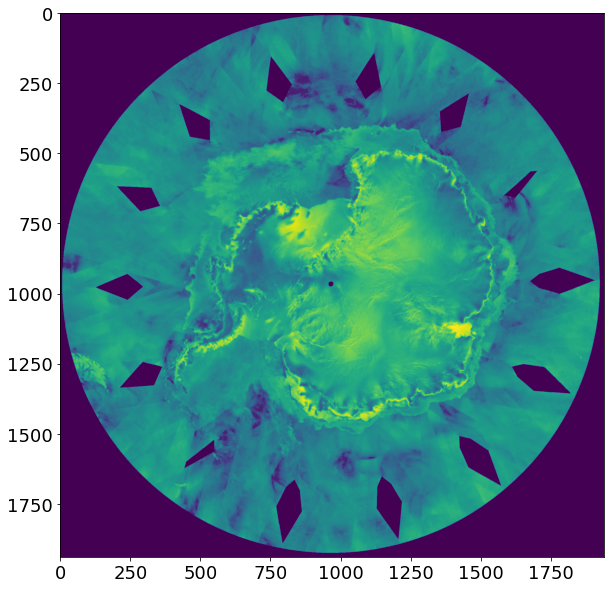

In [137]:
rotfilename='/volstore/spacebridge/nasa_scp_byu/2020/a_imgfiles/msfa-a-Ant20-002-003.sir.img'
with open(rotfilename, 'rb') as f:
    temprot=np.fromfile(f, dtype=np.float32)
    rot=np.reshape(temprot, [1940,1940])
plt.imshow(rot)

In [104]:
1940**2

3763600

## Ice concentration edge

In [8]:
iceconc_max = xr.open_dataset('/volstore/spacebridge/iceconc_osisaf/2021/09/ice_conc_sh_polstere-100_multi_202109_monmax.nc')
iceconc_mean = xr.open_dataset('/volstore/spacebridge/iceconc_osisaf/2021/09/ice_conc_sh_polstere-100_multi_202109_monmean.nc')
iceconc_max

<xarray.Dataset>
Dimensions:                   (time: 1, bnds: 2, yc: 830, xc: 790)
Coordinates:
  * time                      (time) datetime64[ns] 2021-09-16
    lon                       (yc, xc) float32 ...
    lat                       (yc, xc) float32 ...
  * xc                        (xc) float64 -3.945e+03 -3.935e+03 ... 3.945e+03
  * yc                        (yc) float64 4.345e+03 4.335e+03 ... -3.945e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds                 (time, bnds) datetime64[ns] ...
    Polar_Stereographic_Grid  int32 ...
    ice_conc                  (time, yc, xc) float32 ...
    ice_conc_unfiltered       (time, yc, xc) float32 ...
    masks                     (time, yc, xc) float32 ...
    confidence_level          (time, yc, xc) float32 ...
    status_flag               (time, yc, xc) float32 ...
    total_uncertainty         (time, yc, xc) float32 ...
    smearing_uncertainty      (time, yc, xc) float32 ...
    algorithm_uncertainty     (time, yc, xc) float32 ...
Attributes: (12/33)
    CDI:                     Climate Data Interface version 1.9.9rc1 (https:/...
    Conventions:             CF-1.6
    history:                 Fri Dec 10 00:55:30 2021: cdo monmax ice_conc_sh...
    institution:             EUMETSAT OSI SAF
    title:                   Daily Sea Ice Concentration Analysis from OSI SA...
    product_id:              OSI-401
    ...                      ...
    references:              Product User Manual for OSI SAF Global Sea Ice C...
    product_version:         4.0
    software_version:        1.3
    netcdf_version:          3.6.3
    frequency:               mon
    CDO:                     Climate Data Operators version 1.9.9rc1 (https:/...

In [29]:
len(iceconc_mean.ice_conc.data.flatten())

655700

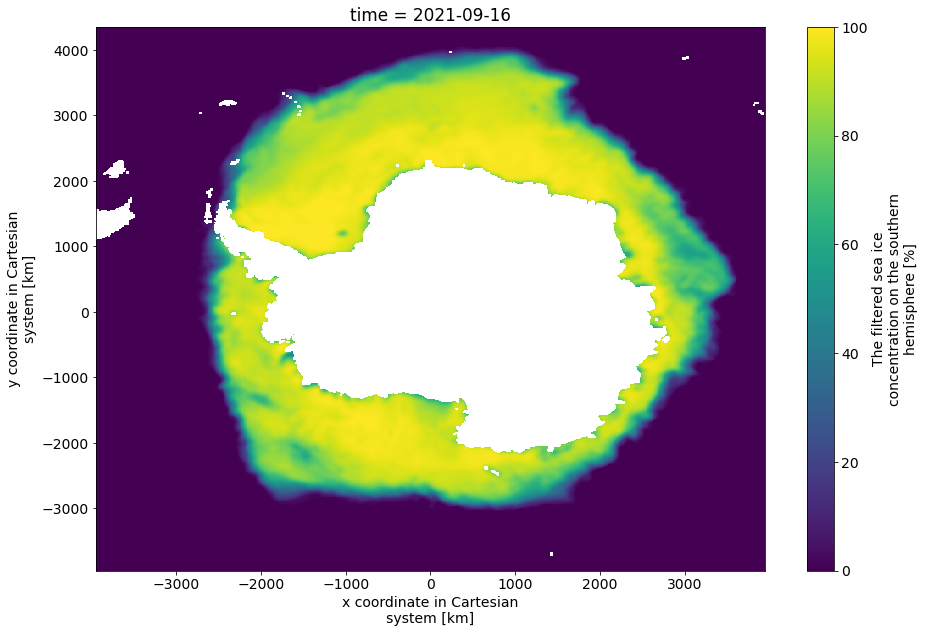

In [16]:
iceconc_mean.ice_conc.where(icecon_mean.ice_conc == plot()

In [10]:
iceedge = pd.DataFrame({'lon': iceconc_mean.ice_conc.lon.data.flatten(),
                        'lat': iceconc_mean.ice_conc.lat.data.flatten(),
                        'edge': iceconc_mean.ice_conc.data.flatten()})
iceedge = iceedge[(iceedge['edge'] > 14.5) & (iceedge['edge'] < 15.5)] 
iceedge.sort_values(by='lon',inplace=True)
zip(iceedge.lon, iceedge.lat)

# Exploratory

## UTAS-NIWA-wave-buoy

In [17]:
plt.rcParams["figure.figsize"] = (20,10)

In [12]:
wb = xr.open_dataarray('/volstore/spacebridge/UTAS-NIWA-wave-buoy/JAPAN_UTAS_waves_ice_2020_fromalison_5jul2021.nc')
wb

MissingDimensionsError: 'time_string' has more than 1-dimension and the same name as one of its dimensions ('time_string', 'chid'). xarray disallows such variables because they conflict with the coordinates used to label dimensions.

In [53]:
from netCDF4 import Dataset
import numpy.ma as ma

In [14]:
wb = Dataset('/volstore/spacebridge/UTAS-NIWA-wave-buoy/JAPAN_UTAS_waves_ice_2020_fromalison_5jul2021.nc', mode='r')
wb.variables.keys()

dict_keys(['buoy', 'time', 'moments_header', 'bin', 'time_string', 'time_str', 'lat', 'lon', 'Tp', 'Hs', 'Hs_processed', 'moments_raw', 'moments_processed', 'psd', 'psd_processed', 'temp', 'deployed', 'qf_mean_removed', 'qf_imu_accel', 'qf_imu_gyro', 'qf_imu_mag', 'qf_gps'])

In [15]:
buoy = wb.variables['buoy'][:]
time = wb.variables['time'][:]
lon  = wb.variables['lon'][:]
lat  = wb.variables['lat'][:]
Tp   = wb.variables['Tp'][:]
Hs   = wb.variables['Hs'][:]
Hs_processed = wb.variables['Hs_processed'][:]

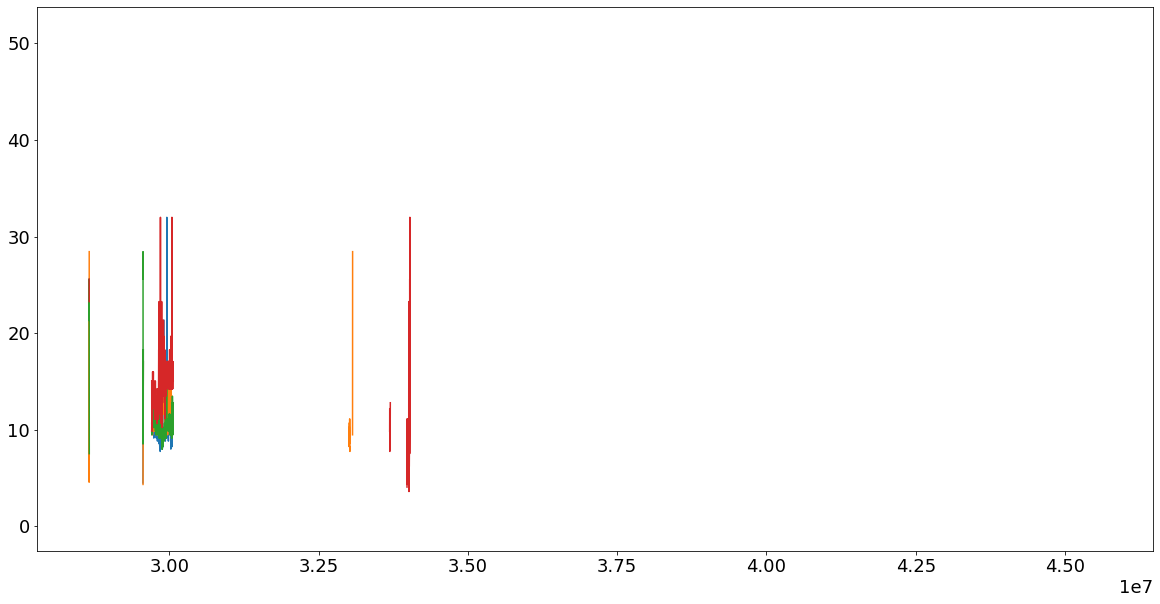

In [18]:
plt.plot(time, Tp[0])
# plt.plot(time, Tp[1])
plt.plot(time, Tp[2])
plt.plot(time, Tp[3])
plt.plot(time, Tp[4])

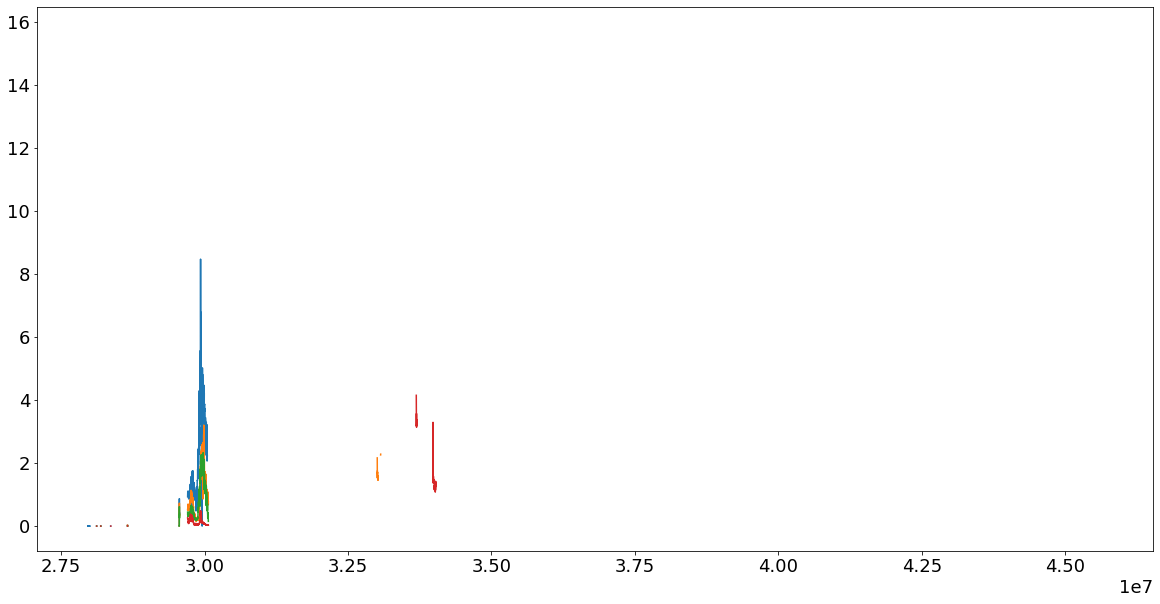

In [19]:
plt.plot(time, Hs_processed[0])
# plt.plot(time, Tp[1])
plt.plot(time, Hs_processed[2])
plt.plot(time, Hs_processed[3])
plt.plot(time, Hs_processed[4])

In [38]:
lon[0].compressed().shape, lat[0].compressed().shape, Tp[0].compressed().shape, Hs[0].compressed().shape, Hs_processed[0].compressed().shape

((531,), (531,), (474,), (474,), (533,))

In [78]:
[(np.min(lon.compressed())), np.max(lon.compressed()) + 100]

[0.0, 14523617.0]

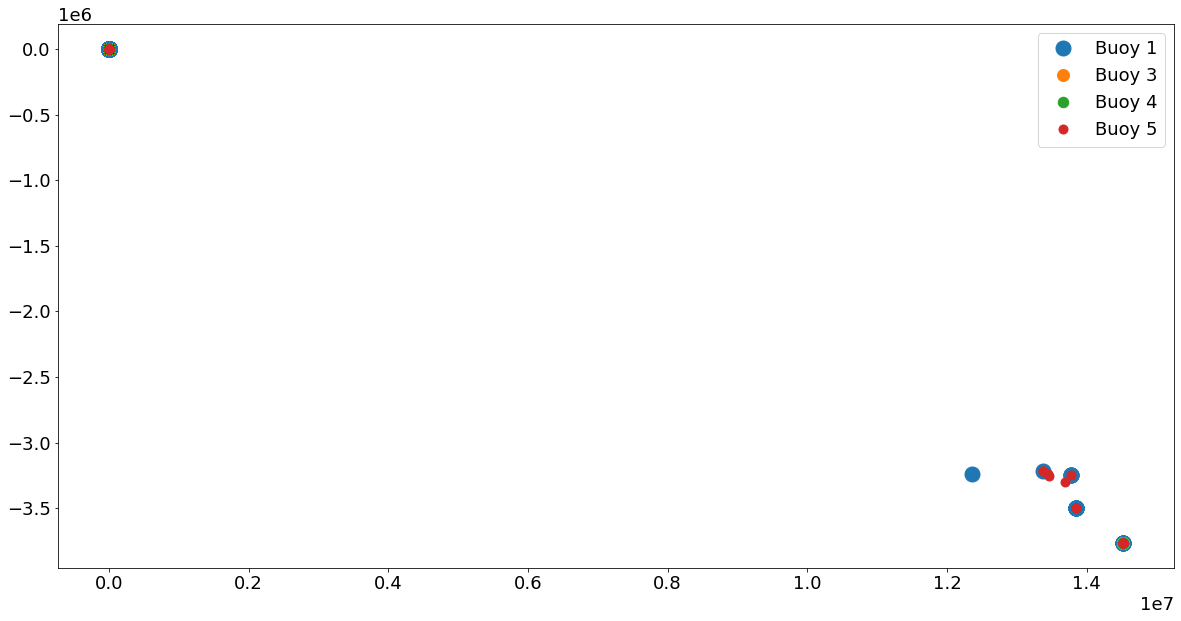

In [80]:
valid_buoys = ma.array(np.arange(5), mask=[0,1]+3*[0])
for i in valid_buoys.compressed():
    plt.plot(lon[i].compressed(), lat[i].compressed(), '.', label=f'Buoy {i+1}', markersize = 30-3*i)
# plt.xlim([np.min(lon.compressed()), np.max(lon.compressed())])
# plt.ylim([np.min(lat.compressed()), np.max(lat.compressed())])
plt.legend()


In [70]:
lat[0].compressed()

array([-3.76516151e+01, -3.76519928e+01, -3.76516304e+01, -3.76511841e+01,
       -3.76514969e+01, -3.76514969e+01, -3.76512451e+01, -3.76512451e+01,
       -3.76516953e+01, -3.76516953e+01, -3.76517715e+01, -3.76516876e+01,
       -3.76515961e+01, -3.76516609e+01, -3.76518364e+01, -3.76518364e+01,
       -3.76517143e+01, -3.76516495e+01, -3.76519318e+01, -3.76518250e+01,
       -3.76517500e+06, -3.76516400e+06, -3.76515300e+06, -3.76518600e+06,
       -3.76514400e+06, -3.76514400e+06, -3.49789200e+06, -3.49789200e+06,
       -3.49793400e+06, -3.49792100e+06, -3.49792100e+06, -3.49792100e+06,
       -3.49792100e+06, -3.49792100e+06, -3.24836900e+06, -3.24836900e+06,
       -3.24836900e+06, -3.24836900e+06, -3.21269200e+06, -3.23515900e+06,
       -3.20536842e+01, -3.20539131e+01, -3.20538673e+01, -3.20555763e+01,
       -3.20535965e+01, -3.20535164e+01, -3.20537033e+01, -3.20537376e+01,
       -3.20536308e+01, -3.20536537e+01, -6.42518082e+01, -6.42518082e+01,
       -6.42869110e+01, -

## Sentinel 1

In [101]:
# im = cv2.imread('/volstore/spacebridge/sentinel1/S1A_EW_GRDM_1SDH_20200913T143952_GEO000.data/Amplitude_HH.img')
# file = open('/volstore/spacebridge/sentinel1/S1A_EW_GRDM_1SDH_20200913T143952_GEO000.data/Amplitude_HH.img', 'rb')
# data = np.fromfile(file, np.dtype('>u2'))
data = data.reshape([27982,26716])

In [103]:
#from #lines and #samples from the .hdr file
27982*26716, data.shape

(747567112, (27982, 26716))

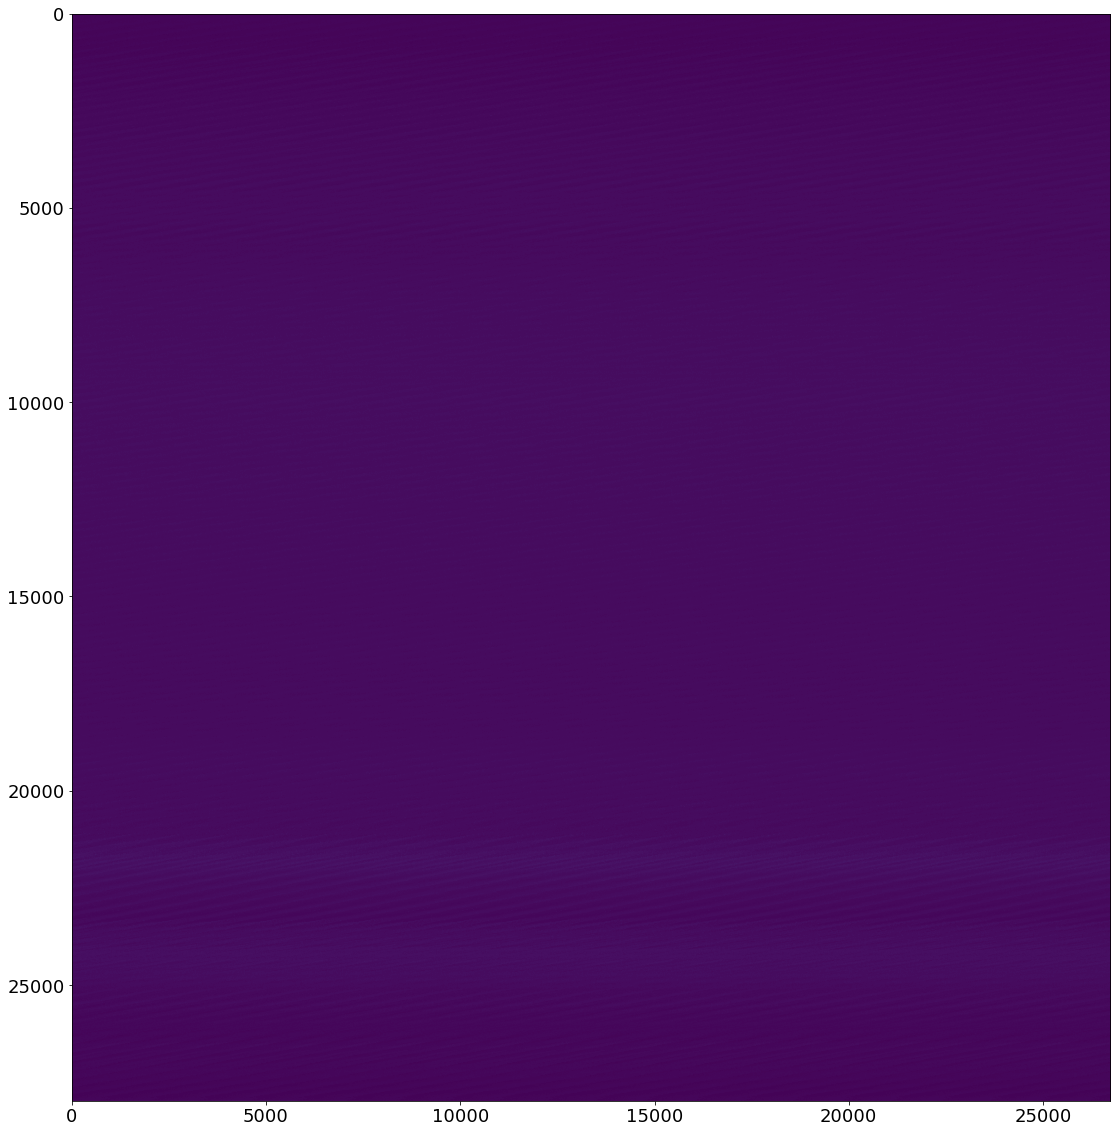

In [104]:
plt.imshow(data)